In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from __future__ import division
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
%matplotlib inline

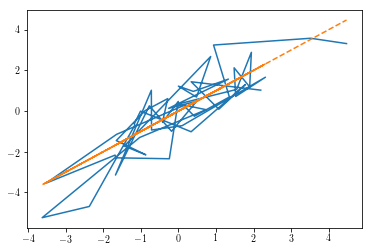

In [2]:
x = 1
X = []
for i in xrange(50):
    x = np.random.normal(x, 1)
    X.append(x)
Y = [np.random.normal(x, 1) for x in X]
plt.plot(X, Y)
plt.plot(np.linspace(min(X), max(X), 100), np.linspace(min(X), max(X), 100), '--')

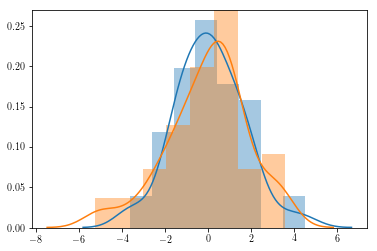

In [3]:
sns.distplot(X)
sns.distplot(Y)

## Kalman Filter

In [4]:
lmbda = 1
mu = Y[0]
lambda_list = [lmbda]
mu_list = [mu]
for i in xrange(1,len(Y)):
    mu, lmbda = (1+lmbda)/(2+lmbda)*Y[i] + lmbda/(2+lmbda)*mu, (2+lmbda)/(1+lmbda)
    lambda_list.append(lmbda)
    mu_list.append(mu)

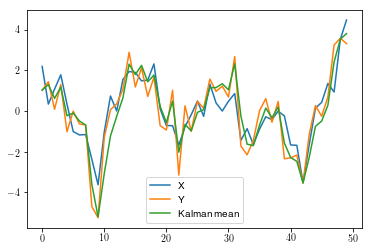

In [5]:
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.plot(mu_list, label='Kalman mean')
plt.legend()
#plt.plot(mu_list + 1/np.sqrt(np.array(lambda_list)), 'g--')
#plt.plot(mu_list - 1/np.sqrt(np.array(lambda_list)), 'g--')
#plt.errorbar(range(50), mu_list, yerr=1/np.sqrt(np.array(lambda_list)), fmt='--')

In [6]:
Y = np.array(Y)
X = np.array(X)
mu_list = np.array(mu_list)
lambda_list = np.array(lambda_list)

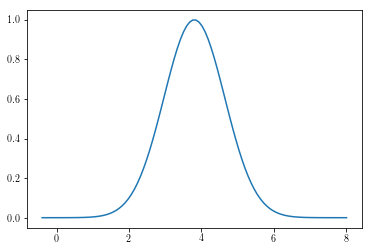

In [7]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
upper = mu + 5*1/np.sqrt(lmbda)
lower = mu - 5*1/np.sqrt(lmbda)
plt.plot(np.linspace(lower,upper,100),gaussian(np.linspace(lower,upper,100), mu_list[-1], 1/np.sqrt(lambda_list[-1])))

## Particle filter

3

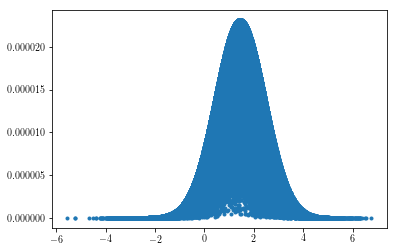

In [70]:
N = 100000
particles = np.ones(N)
weight = np.ones(N)/np.ones(N).sum()
for i in xrange(2):
    particles = np.random.normal(particles, 1)
    weight = weight*gaussian(Y[i], particles, 1)
    weight /= weight.sum()
    
plt.plot(particles, weight, '.')
(weight < 1e-15).sum()

In [66]:
weight[weight < 1e-15].sum()

1.2417934708732247e-12